In [1]:
# Importanweisungen

import sys
import numpy as np
import statistics as stat
import scipy as sci
import scipy.fftpack
#import sympy as sym
import matplotlib.pyplot as plt
get_ipython().run_line_magic('matplotlib', 'inline')
import matplotlib
import matplotlib.axes as axes
from matplotlib import colors as mcolors
import math
from scipy import optimize
import uncertainties as unc
import uncertainties.unumpy as unp
import uncertainties.umath as umath
unv=unp.nominal_values
usd=unp.std_devs

import os

# Konstanten fuer einheitliche Darstellung

fig_size = (10, 6)
fig_legendsize = 14
fig_labelsize = 12
matplotlib.rcParams.update({'font.size': fig_labelsize})

colors = dict(mcolors.BASE_COLORS, **mcolors.CSS4_COLORS)
#colors

# mathe Funktionen
def find_maxima(xarray, yarray, eps=0.):
    #find the positions of the local maxima of yarry array
    #every value with 2 neighbours of lower values gets counted
    #except if it's less than eps away in yarray from the last maximum
    #never uses the outermost values
    #assumes sorted xarray
    result = []
    lastRel = False # true if last value was higher than second to last value
    for i in range(len(xarray)-1):
        if(yarray[i]>=yarray[i+1]):
            if(lastRel):
                if(result==[] or xarray[i]>xarray[result[-1]]+eps): result.append(i)
            lastRel = False
        else: lastRel = True
    return np.array(result)
def find_nearest_index(array, value):
    array = np.asarray(array)
    idx = (np.abs(array - value)).argmin()
    return idx
def find_nearest(array, value):
    array[find_nearest_index(array,value)]
def normalize(ydata):
    return (ydata-np.amin(ydata))/(np.amax(ydata)-np.amin(ydata))
def mean(n):
    # find the mean value and add uncertainties
    k = np.mean(n)
    err = stat.variance(unv(n))
    return unc.ufloat(unv(k), math.sqrt(usd(k)**2 + err))

def fft(y):
    N = len(y)
    fft = scipy.fftpack.fft(y)
    return 2 * abs(fft[:N//2]) / N

    # allgemeine Fitfunktionen

def linear(x,m): # lineare Funktion mit f(x) = m * x
    return(m*x)

def gerade(x, m, b): # gerade mit = f(x) = m * x + b
    return (m*x + b)

def cyclic(x, a, f, phi):
    return a * np.sin(x * f - phi)

def cyclicOff(x, a, f, phi, offset):
    return cyclic(x, a, f, phi) + offset

def gauss(x, x0, A, d, y0):
    return A * np.exp(-(x - x0)**2 / 2 / d**2) + y0

def exponential(x, c, y0):
    return np.exp(c * x) * y0

def custom(x,n):
    m = x
    l = 650.4*10**-9#unc.ufloat(630,10)*10**-9
    #l =unp.uarray([630],[10])*10**-9
    #t = unp.uarray([5],[0.1])*10**-3
    t = 5.05*10**-3#unc.ufloat(5,0.1)*10**-3
    return (n*m*l+m*m*l*l/(4*t))/(m*l+2*t*(n-1))

# fittet ein dataset mit gegebenen x und y werten, eine funktion und ggf. anfangswerten und y-Fehler
# gibt die passenden parameter der funktion, sowie dessen unsicherheiten zurueck
#
# https://stackoverflow.com/questions/14581358/getting-standard-errors-on-fitted-parameters-using-the-optimize-leastsq-method-i#
# Updated on 4/6/2016
# User: https://stackoverflow.com/users/1476240/pedro-m-duarte
def fit_curvefit(datax, datay, function, p0=None, yerr=None, **kwargs):
    pfit, pcov =          optimize.curve_fit(function,datax,datay,p0=p0,                            sigma=yerr, epsfcn=0.0001, **kwargs)
    error = []
    for i in range(len(pfit)):
        try:
          error.append(np.absolute(pcov[i][i])**0.5)
        except:
          error.append( 0.00 )
    pfit_curvefit = pfit
    perr_curvefit = np.array(error)
    return pfit_curvefit, perr_curvefit

# fittet ein dataset mit gegebenen x und y werten, eine funktion und ggf. anfangswerten und y-Fehler
# gibt die passenden parameter der funktion, sowie dessen unsicherheiten zurueck
#
# https://stackoverflow.com/questions/14581358/getting-standard-errors-on-fitted-parameters-using-the-optimize-leastsq-method-i#
# Updated on 4/6/2016
# User: https://stackoverflow.com/users/1476240/pedro-m-duarte
def fit_curvefit2(datax, datay, function, p0=None, yerr=None, **kwargs):
    pfit, pcov =          optimize.curve_fit(function,datax,datay,p0=p0,                            sigma=yerr, epsfcn=0.0001, **kwargs)
    error = []
    for i in range(len(pfit)):
        try:
          error.append(np.absolute(pcov[i][i])**0.5)
        except:
          error.append( 0.00 )
    pfit_curvefit = pfit
    perr_curvefit = np.array(error)
    return unp.uarray(pfit_curvefit, perr_curvefit)
# usage zB:
# pfit, perr = fit_curvefit(unv(xdata), unv(ydata), gerade, yerr = usd(ydata), p0 = [1, 0])
# fuer eine gerade mit anfangswerten m = 1, b = 0

# weitere Werte, Konstanten
# Werte von https://physics.nist.gov/cuu/Constants/index.html[0]

q = 1.602176634e-19 # C 
c = 299792458 # m/s
k_B = unc.ufloat_fromstr("1.38064852(79)e-23") # J K-1 [0]
h = unc.ufloat_fromstr("4.135667662(25)e-15") # eV s [0]
r_e = unc.ufloat_fromstr("2.8179403227(19)e-15") # m [0]
R = unc.ufloat_fromstr("8.3144598(48)") # J mol-1 K-1 [0]
K = 273.15 # kelvin
g = 9.81 # m/s^2
rad = 360 / 2 / math.pi
grad = 1/rad

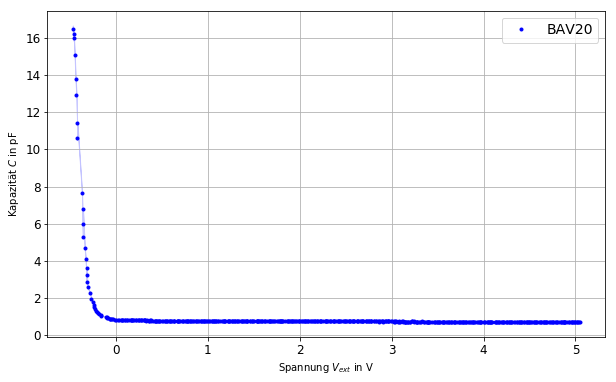

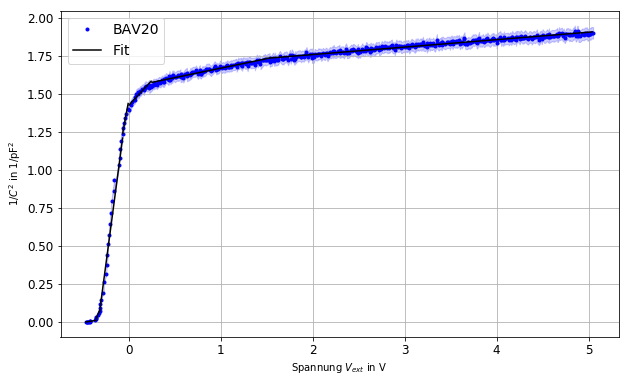

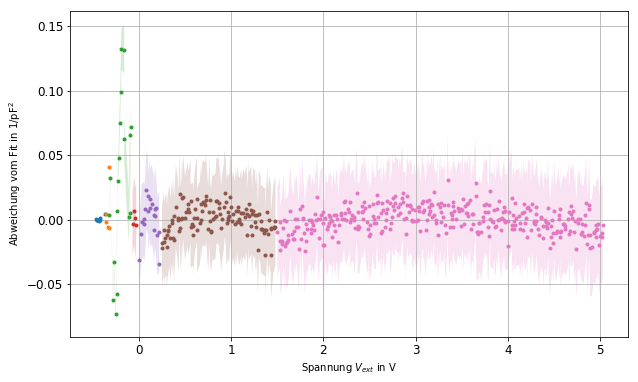

0.336+/-0.022


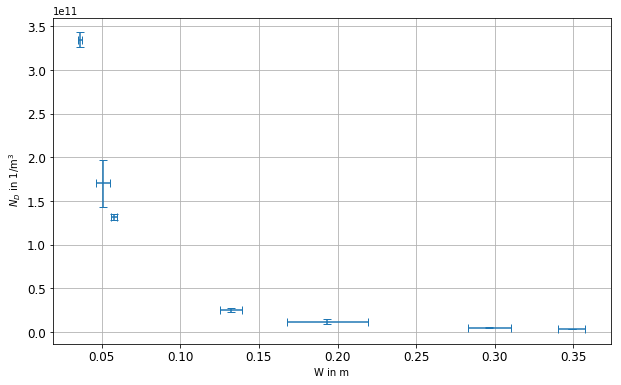

In [2]:
# BAV20
nindex = 0
file = ["schottky_ba.csv","schottky_sb.csv"][nindex]
name = ["BAV20","SB160"][nindex]
#low_cutoff = [52,0][nindex]
#yfehler = [0.01, 0.003][nindex]

arr = np.loadtxt("data/"+file, skiprows = 2, delimiter=",") #delimiter="," unpack=True,
data_pre = np.transpose(np.sort(arr.view('d,d,d'), order=['f2'], axis=0).view(np.double))
low_cutoff = find_nearest_index(data_pre[0], -4) +10
data_x = data_pre[2][low_cutoff:]
data_y = data_pre[0][low_cutoff:]
xerror = np.zeros(len(data_x)) + 0.01
yerror = np.zeros(len(data_x)) + data_y*0.01 #+ yfehler 
xdata = unp.uarray(data_x,xerror)
ydata = unp.uarray(data_y,yerror)

fig=plt.figure(figsize=fig_size)
plt.plot(unv(xdata), unv(ydata), ".", color="b", label=name)
plt.fill_between(unv(xdata), unv(ydata) - usd(ydata), unv(ydata) + usd(ydata), facecolor='b',
                 alpha=0.2, color="b")
#plt.fill_betweenx(unv(ydata),unv(xdata)-usd(xdata),unv(xdata)+usd(xdata),facecolor='b',alpha=0.2, label="ab, x")
plt.grid()
plt.tick_params(labelsize=fig_labelsize)
plt.xlabel(r'Spannung $V_{ext}$ in V')
plt.ylabel(r'Kapazität $C$ in pF')
plt.legend(prop={'size':fig_legendsize})
plt.savefig("img/%s_c.png" % name)
plt.show()

ydata = 1/ydata**2

#fitting:

#fitNr = 10 # number of fit intervals to do
#fitBorders = np.linspace(unv(xdata[0]), unv(xdata[-1]), num=fitNr) #borders of the sections
#fitDI = math.floor(len(xdata)/fitNr) # # ofpoints between intervals
#fitBorderIndeces = list(range(0, len(xdata), fitDI)) # gives fitNr+1 including len(xdata)
fitBorderIndeces = [0,10, 16, 35, find_nearest_index(unv(xdata), 0),
                    find_nearest_index(unv(xdata), 0.25), find_nearest_index(unv(xdata), 1.5),
                    len(xdata)-1]
fitParams = [] #unp.uarray((len(fitBorderIndeces)-1, 2)) # list of fit Params for each section
for i in range(len(fitBorderIndeces)-1):
    lower = fitBorderIndeces[i]
    higher = fitBorderIndeces[i+1]-1 # sollen sich nicht überlappen
    fitParams.append(fit_curvefit2(unv(xdata[lower:higher]), unv(ydata[lower:higher]), gerade,
                       yerr = usd(ydata[lower:higher]), maxfev=100000, p0 = [5,0]))
#print(fitParams[0][0])

fig=plt.figure(figsize=fig_size)
plt.plot(unv(xdata), unv(ydata), ".", color="b", label=name)
for i in range(len(fitBorderIndeces)-1):
    x1 = unv(xdata[fitBorderIndeces[i]])
    x2 = unv(xdata[fitBorderIndeces[i+1]-1])
    y1 = unv(fitParams[i][0]) * x1 + unv(fitParams[i][1])
    y2 = unv(fitParams[i][0]) * x2 + unv(fitParams[i][1])
    plt.plot([x1,x2], [y1,y2], color="black", label="Fit")
plt.fill_between(unv(xdata), unv(ydata) - usd(ydata), unv(ydata) + usd(ydata), facecolor='b',
                 alpha=0.2, color="b")
#plt.fill_betweenx(unv(ydata),unv(xdata)-usd(xdata),unv(xdata)+usd(xdata),facecolor='b',alpha=0.2, label="ab, x")
#plt.yscale("log")
plt.grid()
plt.tick_params(labelsize=fig_labelsize)
plt.xlabel(r'Spannung $V_{ext}$ in V')
plt.ylabel(r'$1/C^2$ in 1/pF$^2$')
plt.legend(prop={'size':fig_legendsize})
plt.savefig("img/%s_cquadrat.png" % name)
plt.show()

#plt.errorbar(unv(xdata),unv(ydata), xerr=usd(xdata), yerr=usd(ydata),fmt=' ', capsize=5)
#plt.fill_between(unv(xdata), unv(ydata) - usd(ydata), unv(ydata) + usd(ydata), facecolor='b', alpha=0.2, label="ab, y")
# xerror schwierig
#ax.fill_between(x, y_est - y_err, y_est + y_err, alpha=0.2)
#plt.fill_betweenx(unv(ydata),unv(xdata)-usd(xdata),unv(xdata)+usd(xdata),facecolor='b',alpha=0.2)
#plt.fill_betweenx(y,x-xerr,x+xerr,facecolor='b',alpha=0.5)
#plt.errorbar([], [],[],[], ' ', color="green",label='$I_{sc} = %s$ %s' % (ydata[xind],units[0]))

#residuenplot, Beispiel für 3. Fit:

fig=plt.figure(figsize=fig_size)
for i in range(len(fitBorderIndeces)-1):
    lower = fitBorderIndeces[i]
    higher = fitBorderIndeces[i+1]-1 # sollen sich nicht überlappen
    xcrop = xdata[lower:higher]
    ycrop = ydata[lower:higher]
    yfit = unv(fitParams[i][0])*unv(xcrop) + unv(fitParams[i][1])
    yAbw = ycrop - yfit
    plt.plot(unv(xcrop),unv(yAbw),".")
    plt.fill_between(unv(xcrop), unv(yAbw) - usd(yAbw), unv(yAbw) + usd(yAbw), alpha=0.2)
    #plt.errorbar(unv(xcrop),unv(yAbw), usd(yAbw), usd(xcrop),fmt=' ', capsize=5,linewidth=2)
#plt.plot(unv(xcrop), unv(ycrop), ".", color="b", label=name)
#plt.plot(unv(xcrop), unv(yfit), ".", color="r", label=name)
plt.grid()
plt.tick_params(labelsize=fig_labelsize)
plt.xlabel(r'Spannung $V_{ext}$ in V')
plt.ylabel(r'Abweichung vom Fit in 1/pF$^2$')
plt.savefig("img/%s_residuen.png" % name)
plt.show()

eps_vak = 8.8541878128e-12
eps_ge = eps_vak * unc.ufloat(16.6, 0.03)
eps_si = eps_vak * unc.ufloat(11.8, 0.03)

eps = [eps_ge,eps_si][1] # !!! Anpassen: Ge für 0A91, Si sonst
#     SB160 BAV20 0A91 1N4148  !!! Anpassen
A_index = 1
A_F = unc.ufloat([3.1, 2.7,  4.9, 3.1][A_index], 0.03) * 1e-3
index_for_x = 2# index of fit to use for x-Achsenabschnitt

fitParamsArr = np.array(fitParams)
V_bi = fitParamsArr[index_for_x,1] / fitParamsArr[index_for_x,0] # so korrekt, positiv definiert
N_D = (2/(fitParamsArr[:,:1] * eps*q* A_F**2)*1e-24) [:,0] # in 1/m^3
V_ext = 0
W = unp.sqrt(2*eps*(V_bi-V_ext)/q/N_D)
#print(eps), print(V_bi), print(q), print(N_D[0])
print(V_bi)

fig=plt.figure(figsize=fig_size)
plt.errorbar(unv(W),unv(N_D), xerr=usd(W), yerr=usd(N_D),fmt=' ', capsize=4)
plt.grid()
plt.tick_params(labelsize=fig_labelsize)
plt.xlabel(r'W in m')
plt.ylabel(r' $N_D$ in $1/$m$^3$')
#plt.legend(prop={'size':fig_legendsize})
plt.savefig("img/%s_dotprof.png" % name)
plt.show()

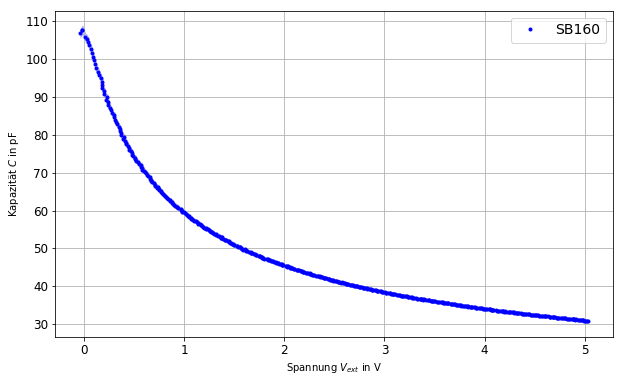

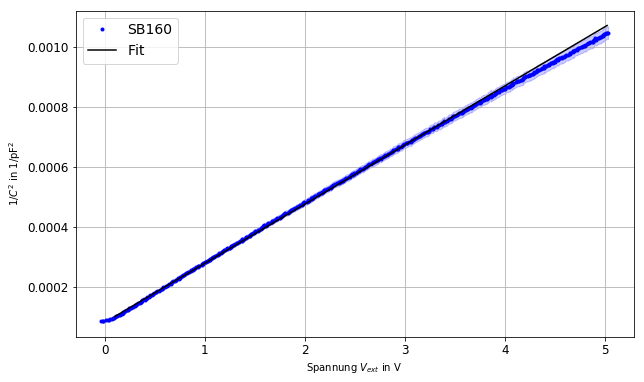

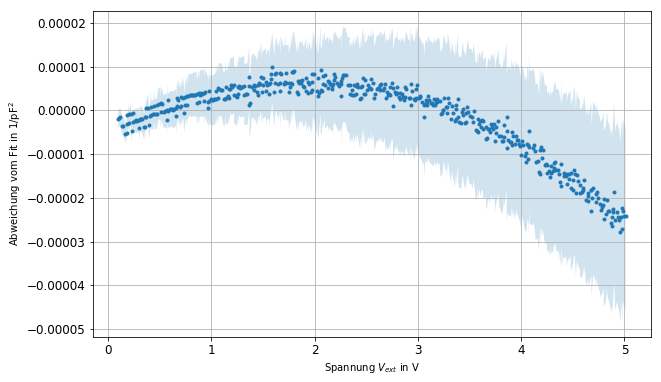

V_bi in V:
0.4209+/-0.0014
W in mm:
(2.949+/-0.030)e-06
N_D in 1/m^3:
(6.31+/-0.12)e+13


In [3]:
# SB160
nindex = 1
file = ["schottky_ba.csv","schottky_sb.csv"][nindex]
name = ["BAV20","SB160"][nindex]
#low_cutoff = [52,0][nindex]
#yfehler = [0.01, 0.003][nindex]

arr = np.loadtxt("data/"+file, skiprows = 2, delimiter=",") #delimiter="," unpack=True,
data_pre = np.transpose(np.sort(arr.view('d,d,d'), order=['f2'], axis=0).view(np.double))
low_cutoff = find_nearest_index(data_pre[0], -4) +10
data_x = data_pre[2][low_cutoff:]
data_y = data_pre[0][low_cutoff:]
xerror = np.zeros(len(data_x)) + 0.01
yerror = np.zeros(len(data_x)) + data_y*0.01 #+ yfehler 
xdata = unp.uarray(data_x,xerror)
ydata = unp.uarray(data_y,yerror)

fig=plt.figure(figsize=fig_size)
plt.plot(unv(xdata), unv(ydata), ".", color="b", label=name)
plt.fill_between(unv(xdata), unv(ydata) - usd(ydata), unv(ydata) + usd(ydata), facecolor='b',
                 alpha=0.2, color="b")
#plt.fill_betweenx(unv(ydata),unv(xdata)-usd(xdata),unv(xdata)+usd(xdata),facecolor='b',alpha=0.2, label="ab, x")
plt.grid()
plt.tick_params(labelsize=fig_labelsize)
plt.xlabel(r'Spannung $V_{ext}$ in V')
plt.ylabel(r'Kapazität $C$ in pF')
plt.legend(prop={'size':fig_legendsize})
plt.savefig("img/%s_c.png" % name)
plt.show()

ydata = 1/ydata**2

#fitting:

#fitNr = 10 # number of fit intervals to do
#fitBorders = np.linspace(unv(xdata[0]), unv(xdata[-1]), num=fitNr) #borders of the sections
#fitDI = math.floor(len(xdata)/fitNr) # # ofpoints between intervals
#fitBorderIndeces = list(range(0, len(xdata), fitDI)) # gives fitNr+1 including len(xdata)
fitBorderIndeces = [10, len(xdata)-1]
fitParams = [] #unp.uarray((len(fitBorderIndeces)-1, 2)) # list of fit Params for each section
for i in range(len(fitBorderIndeces)-1):
    lower = fitBorderIndeces[i]
    higher = fitBorderIndeces[i+1]-1 # sollen sich nicht überlappen
    fitParams.append(fit_curvefit2(unv(xdata[lower:higher]), unv(ydata[lower:higher]), gerade,
                       yerr = usd(ydata[lower:higher]), maxfev=100000, p0 = [5,0]))
#print(fitParams[0][0])

fig=plt.figure(figsize=fig_size)
plt.plot(unv(xdata), unv(ydata), ".", color="b", label=name)
for i in range(len(fitBorderIndeces)-1):
    x1 = unv(xdata[fitBorderIndeces[i]])
    x2 = unv(xdata[fitBorderIndeces[i+1]-1])
    y1 = unv(fitParams[i][0]) * x1 + unv(fitParams[i][1])
    y2 = unv(fitParams[i][0]) * x2 + unv(fitParams[i][1])
    plt.plot([x1,x2], [y1,y2], color="black", label="Fit")
plt.fill_between(unv(xdata), unv(ydata) - usd(ydata), unv(ydata) + usd(ydata), facecolor='b',
                 alpha=0.2, color="b")
#plt.fill_betweenx(unv(ydata),unv(xdata)-usd(xdata),unv(xdata)+usd(xdata),facecolor='b',alpha=0.2, label="ab, x")
#plt.yscale("log")
plt.grid()
plt.tick_params(labelsize=fig_labelsize)
plt.xlabel(r'Spannung $V_{ext}$ in V')
plt.ylabel(r'$1/C^2$ in 1/pF$^2$')
plt.legend(prop={'size':fig_legendsize})
plt.savefig("img/%s_cquadrat.png" % name)
plt.show()

#plt.errorbar(unv(xdata),unv(ydata), xerr=usd(xdata), yerr=usd(ydata),fmt=' ', capsize=5)
#plt.fill_between(unv(xdata), unv(ydata) - usd(ydata), unv(ydata) + usd(ydata), facecolor='b', alpha=0.2, label="ab, y")
# xerror schwierig
#ax.fill_between(x, y_est - y_err, y_est + y_err, alpha=0.2)
#plt.fill_betweenx(unv(ydata),unv(xdata)-usd(xdata),unv(xdata)+usd(xdata),facecolor='b',alpha=0.2)
#plt.fill_betweenx(y,x-xerr,x+xerr,facecolor='b',alpha=0.5)
#plt.errorbar([], [],[],[], ' ', color="green",label='$I_{sc} = %s$ %s' % (ydata[xind],units[0]))

#residuenplot, Beispiel für 3. Fit:

fig=plt.figure(figsize=fig_size)
for i in range(len(fitBorderIndeces)-1):
    lower = fitBorderIndeces[i]
    higher = fitBorderIndeces[i+1]-1 # sollen sich nicht überlappen
    xcrop = xdata[lower:higher]
    ycrop = ydata[lower:higher]
    yfit = unv(fitParams[i][0])*unv(xcrop) + unv(fitParams[i][1])
    yAbw = ycrop - yfit
    plt.plot(unv(xcrop),unv(yAbw),".")
    plt.fill_between(unv(xcrop), unv(yAbw) - usd(yAbw), unv(yAbw) + usd(yAbw), alpha=0.2)
    #plt.errorbar(unv(xcrop),unv(yAbw), usd(yAbw), usd(xcrop),fmt=' ', capsize=5,linewidth=2)
#plt.plot(unv(xcrop), unv(ycrop), ".", color="b", label=name)
#plt.plot(unv(xcrop), unv(yfit), ".", color="r", label=name)
plt.grid()
plt.tick_params(labelsize=fig_labelsize)
plt.xlabel(r'Spannung $V_{ext}$ in V')
plt.ylabel(r'Abweichung vom Fit in 1/pF$^2$')
plt.savefig("img/%s_residuen.png" % name)
plt.show()

# Berechnungen:

eps_vak = 8.8541878128e-12
eps_ge = eps_vak * unc.ufloat(16.6, 0.03)
eps_si = eps_vak * unc.ufloat(11.8, 0.03)

eps = [eps_ge,eps_si][1] # !!! Anpassen: Ge für 0A91, Si sonst
#     SB160 BAV20 0A91 1N4148  !!! Anpassen
A_index = 0
A_F = unc.ufloat([3.1, 2.7,  4.9, 3.1][A_index], 0.03) * 1e-3
index_for_x = 0# index of fit to use for x-Achsenabschnitt

fitParamsArr = np.array(fitParams)
V_bi = fitParamsArr[index_for_x,1] / fitParamsArr[index_for_x,0] # so korrekt, positiv definiert
N_D = (2/(fitParamsArr[:,:1] * eps*q* A_F**2)*1e-24) [:,0] # in 1/m^3
V_ext = 0
W = unp.sqrt(2*eps*(V_bi-V_ext)/q/N_D)
#print(eps), print(V_bi), print(q), print(N_D[0])

print("V_bi in V:")
print(V_bi)
print("W in mm:")
print(W[0]*1e3)
print("N_D in 1/m^3:")
print(N_D[0])

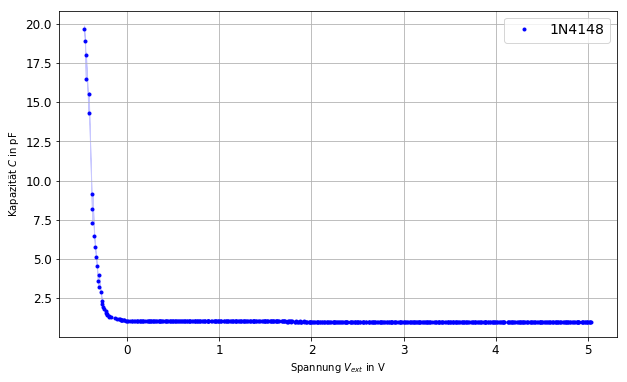

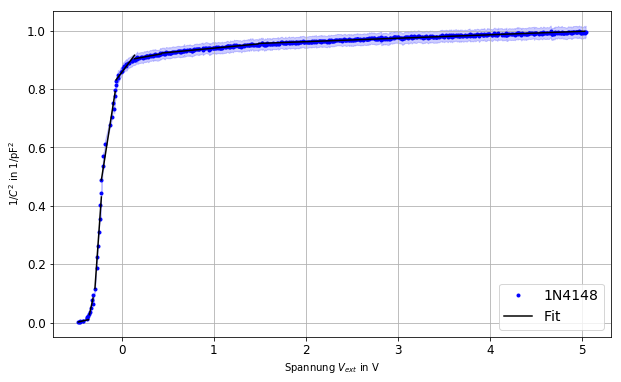

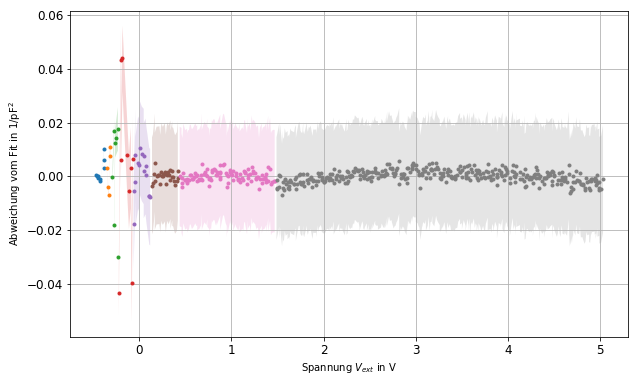

0.316+/-0.030


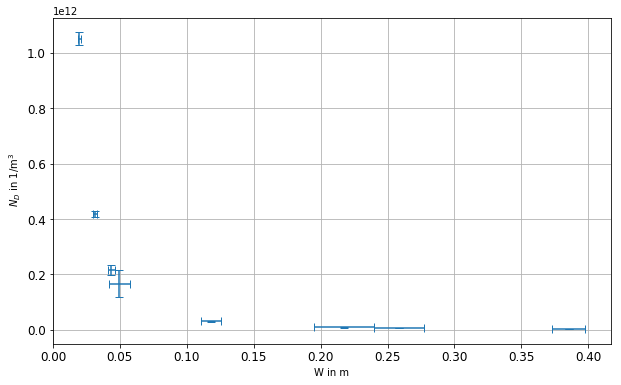

In [4]:
# 1N4148,
nindex = 1
file = ["pn_diode0A.csv","pn_diode1n.csv"][nindex]
name = ["0A91","1N4148"][nindex]

arr = np.loadtxt("data/"+file, skiprows = 2, delimiter=",") #delimiter="," unpack=True,
data_pre = np.transpose(np.sort(arr.view('d,d,d'), order=['f2'], axis=0).view(np.double))
low_cutoff = find_nearest_index(data_pre[0], -4) +10
data_x = data_pre[2][low_cutoff:]
data_y = data_pre[0][low_cutoff:]
xerror = np.zeros(len(data_x)) + 0.01
yerror = np.zeros(len(data_x)) + data_y*0.01 #+ yfehler 
xdata = unp.uarray(data_x,xerror)
ydata = unp.uarray(data_y,yerror)

fig=plt.figure(figsize=fig_size)
plt.plot(unv(xdata), unv(ydata), ".", color="b", label=name)
plt.fill_between(unv(xdata), unv(ydata) - usd(ydata), unv(ydata) + usd(ydata), facecolor='b',
                 alpha=0.2, color="b")
#plt.fill_betweenx(unv(ydata),unv(xdata)-usd(xdata),unv(xdata)+usd(xdata),facecolor='b',alpha=0.2, label="ab, x")
plt.grid()
plt.tick_params(labelsize=fig_labelsize)
plt.xlabel(r'Spannung $V_{ext}$ in V')
plt.ylabel(r'Kapazität $C$ in pF')
plt.legend(prop={'size':fig_legendsize})
plt.savefig("img/%s_c.png" % name)
plt.show()

ydata = 1/ydata**2

#fitting:

#fitNr = 10 # number of fit intervals to do
#fitBorders = np.linspace(unv(xdata[0]), unv(xdata[-1]), num=fitNr) #borders of the sections
#fitDI = math.floor(len(xdata)/fitNr) # # ofpoints between intervals
#fitBorderIndeces = list(range(0, len(xdata), fitDI)) # gives fitNr+1 including len(xdata)
fitBorderIndeces = [0,10, 16, 24, 34, 50,
                    80, find_nearest_index(unv(xdata), 1.5),
                    len(xdata)-1]
fitParams = [] #unp.uarray((len(fitBorderIndeces)-1, 2)) # list of fit Params for each section
for i in range(len(fitBorderIndeces)-1):
    lower = fitBorderIndeces[i]
    higher = fitBorderIndeces[i+1]-1 # sollen sich nicht überlappen
    fitParams.append(fit_curvefit2(unv(xdata[lower:higher]), unv(ydata[lower:higher]), gerade,
                       yerr = usd(ydata[lower:higher]), maxfev=100000, p0 = [5,0]))
#print(fitParams[0][0])

fig=plt.figure(figsize=fig_size)
plt.plot(unv(xdata), unv(ydata), ".", color="b", label=name)
for i in range(len(fitBorderIndeces)-1):
    x1 = unv(xdata[fitBorderIndeces[i]])
    x2 = unv(xdata[fitBorderIndeces[i+1]-1])
    y1 = unv(fitParams[i][0]) * x1 + unv(fitParams[i][1])
    y2 = unv(fitParams[i][0]) * x2 + unv(fitParams[i][1])
    plt.plot([x1,x2], [y1,y2], color="black", label="Fit")
plt.fill_between(unv(xdata), unv(ydata) - usd(ydata), unv(ydata) + usd(ydata), facecolor='b',
                 alpha=0.2, color="b")
#plt.fill_betweenx(unv(ydata),unv(xdata)-usd(xdata),unv(xdata)+usd(xdata),facecolor='b',alpha=0.2, label="ab, x")
#plt.yscale("log")
plt.grid()
plt.tick_params(labelsize=fig_labelsize)
plt.xlabel(r'Spannung $V_{ext}$ in V')
plt.ylabel(r'$1/C^2$ in 1/pF$^2$')
plt.legend(prop={'size':fig_legendsize})
plt.savefig("img/%s_cquadrat.png" % name)
plt.show()

#plt.errorbar(unv(xdata),unv(ydata), xerr=usd(xdata), yerr=usd(ydata),fmt=' ', capsize=5)
#plt.fill_between(unv(xdata), unv(ydata) - usd(ydata), unv(ydata) + usd(ydata), facecolor='b', alpha=0.2, label="ab, y")
# xerror schwierig
#ax.fill_between(x, y_est - y_err, y_est + y_err, alpha=0.2)
#plt.fill_betweenx(unv(ydata),unv(xdata)-usd(xdata),unv(xdata)+usd(xdata),facecolor='b',alpha=0.2)
#plt.fill_betweenx(y,x-xerr,x+xerr,facecolor='b',alpha=0.5)
#plt.errorbar([], [],[],[], ' ', color="green",label='$I_{sc} = %s$ %s' % (ydata[xind],units[0]))

#residuenplot

fig=plt.figure(figsize=fig_size)
for i in range(len(fitBorderIndeces)-1):
    lower = fitBorderIndeces[i]
    higher = fitBorderIndeces[i+1]-1 # sollen sich nicht überlappen
    xcrop = xdata[lower:higher]
    ycrop = ydata[lower:higher]
    yfit = unv(fitParams[i][0])*unv(xcrop) + unv(fitParams[i][1])
    yAbw = ycrop - yfit
    plt.plot(unv(xcrop),unv(yAbw),".")
    plt.fill_between(unv(xcrop), unv(yAbw) - usd(yAbw), unv(yAbw) + usd(yAbw), alpha=0.2)
    #plt.errorbar(unv(xcrop),unv(yAbw), usd(yAbw), usd(xcrop),fmt=' ', capsize=5,linewidth=2)
#plt.plot(unv(xcrop), unv(ycrop), ".", color="b", label=name)
#plt.plot(unv(xcrop), unv(yfit), ".", color="r", label=name)
plt.grid()
plt.tick_params(labelsize=fig_labelsize)
plt.xlabel(r'Spannung $V_{ext}$ in V')
plt.ylabel(r'Abweichung vom Fit in 1/pF$^2$')
plt.savefig("img/%s_residuen.png" % name)
plt.show()

eps_vak = 8.8541878128e-12
eps_ge = eps_vak * unc.ufloat(16.6, 0.03)
eps_si = eps_vak * unc.ufloat(11.8, 0.03)

eps = [eps_ge,eps_si][1] # !!! Anpassen: Ge für 0A91, Si sonst
#     SB160 BAV20 0A91 1N4148  !!! Anpassen
A_index = 3
A_F = unc.ufloat([3.1, 2.7,  4.9, 3.1][A_index], 0.03) * 1e-3
index_for_x = 2# index of fit to use for x-Achsenabschnitt

fitParamsArr = np.array(fitParams)
V_bi = fitParamsArr[index_for_x,1] / fitParamsArr[index_for_x,0] # so korrekt, positiv definiert
N_D = (2/(fitParamsArr[:,:1] * eps*q* A_F**2)*1e-24) [:,0] # in 1/m^3
V_ext = 0
W = unp.sqrt(2*eps*(V_bi-V_ext)/q/N_D)
#print(eps), print(V_bi), print(q), print(N_D[0])
print(V_bi)

fig=plt.figure(figsize=fig_size)
plt.errorbar(unv(W),unv(N_D), xerr=usd(W), yerr=usd(N_D),fmt=' ', capsize=4)
plt.grid()
plt.tick_params(labelsize=fig_labelsize)
plt.xlabel(r'W in m')
plt.ylabel(r' $N_D$ in $1/$m$^3$')
#plt.legend(prop={'size':fig_legendsize})
plt.savefig("img/%s_dotprof.png" % name)
plt.show()

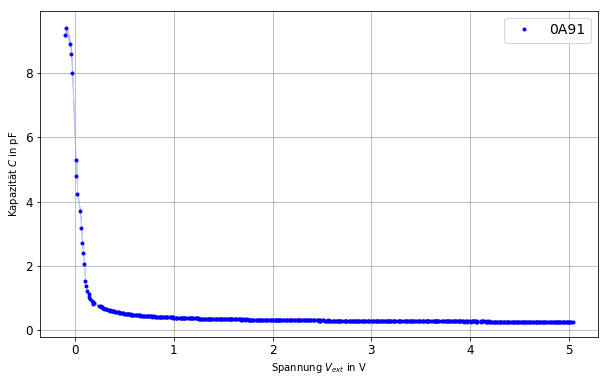

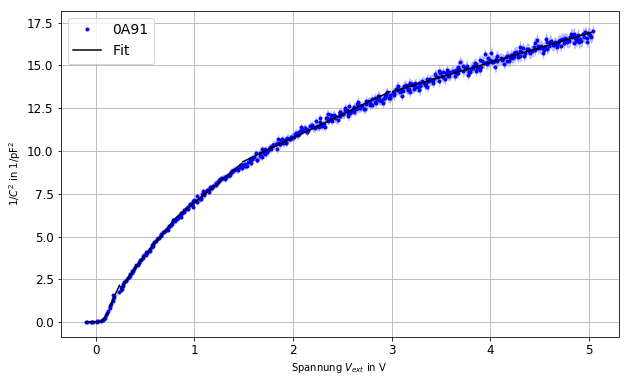

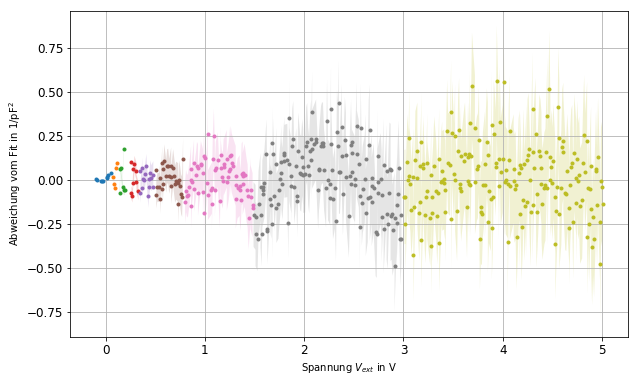

4.84+/-0.08


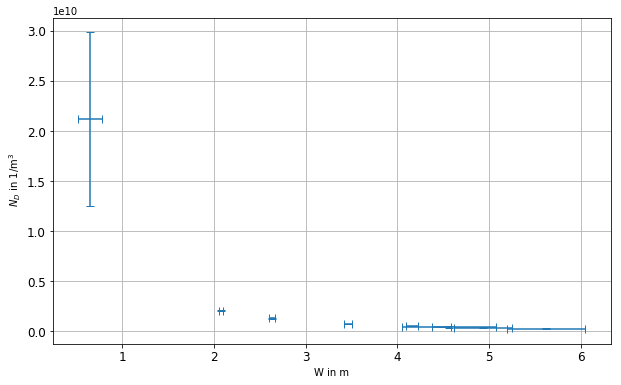

In [5]:
# 0A91
nindex = 0
file = ["pn_diode0A.csv","pn_diode1n.csv"][nindex]
name = ["0A91","1N4148"][nindex]

arr = np.loadtxt("data/"+file, skiprows = 2, delimiter=",") #delimiter="," unpack=True,
data_pre = np.transpose(np.sort(arr.view('d,d,d'), order=['f2'], axis=0).view(np.double))
low_cutoff = find_nearest_index(data_pre[0], -4) +10
data_x = data_pre[2][low_cutoff:]
data_y = data_pre[0][low_cutoff:]
xerror = np.zeros(len(data_x)) + 0.01
yerror = np.zeros(len(data_x)) + data_y*0.01 #+ yfehler 
xdata = unp.uarray(data_x,xerror)
ydata = unp.uarray(data_y,yerror)

fig=plt.figure(figsize=fig_size)
plt.plot(unv(xdata), unv(ydata), ".", color="b", label=name)
plt.fill_between(unv(xdata), unv(ydata) - usd(ydata), unv(ydata) + usd(ydata), facecolor='b',
                 alpha=0.2, color="b")
#plt.fill_betweenx(unv(ydata),unv(xdata)-usd(xdata),unv(xdata)+usd(xdata),facecolor='b',alpha=0.2, label="ab, x")
plt.grid()
plt.tick_params(labelsize=fig_labelsize)
plt.xlabel(r'Spannung $V_{ext}$ in V')
plt.ylabel(r'Kapazität $C$ in pF')
plt.legend(prop={'size':fig_legendsize})
plt.savefig("img/%s_c.png" % name)
plt.show()

ydata = 1/ydata**2

#fitting:

#fitNr = 10 # number of fit intervals to do
#fitBorders = np.linspace(unv(xdata[0]), unv(xdata[-1]), num=fitNr) #borders of the sections
#fitDI = math.floor(len(xdata)/fitNr) # # ofpoints between intervals
#fitBorderIndeces = list(range(0, len(xdata), fitDI)) # gives fitNr+1 including len(xdata)
fitBorderIndeces = [0,10, 16, 24, 34, 50,
                    80, find_nearest_index(unv(xdata), 1.5), find_nearest_index(unv(xdata), 3),
                    len(xdata)-1]
fitParams = [] #unp.uarray((len(fitBorderIndeces)-1, 2)) # list of fit Params for each section
for i in range(len(fitBorderIndeces)-1):
    lower = fitBorderIndeces[i]
    higher = fitBorderIndeces[i+1]-1 # sollen sich nicht überlappen
    fitParams.append(fit_curvefit2(unv(xdata[lower:higher]), unv(ydata[lower:higher]), gerade,
                       yerr = usd(ydata[lower:higher]), maxfev=100000, p0 = [5,0]))
#print(fitParams[0][0])

fig=plt.figure(figsize=fig_size)
plt.plot(unv(xdata), unv(ydata), ".", color="b", label=name)
for i in range(len(fitBorderIndeces)-1):
    x1 = unv(xdata[fitBorderIndeces[i]])
    x2 = unv(xdata[fitBorderIndeces[i+1]-1])
    y1 = unv(fitParams[i][0]) * x1 + unv(fitParams[i][1])
    y2 = unv(fitParams[i][0]) * x2 + unv(fitParams[i][1])
    plt.plot([x1,x2], [y1,y2], color="black", label="Fit")
plt.fill_between(unv(xdata), unv(ydata) - usd(ydata), unv(ydata) + usd(ydata), facecolor='b',
                 alpha=0.2, color="b")
#plt.fill_betweenx(unv(ydata),unv(xdata)-usd(xdata),unv(xdata)+usd(xdata),facecolor='b',alpha=0.2, label="ab, x")
#plt.yscale("log")
plt.grid()
plt.tick_params(labelsize=fig_labelsize)
plt.xlabel(r'Spannung $V_{ext}$ in V')
plt.ylabel(r'$1/C^2$ in 1/pF$^2$')
plt.legend(prop={'size':fig_legendsize})
plt.savefig("img/%s_cquadrat.png" % name)
plt.show()

#plt.errorbar(unv(xdata),unv(ydata), xerr=usd(xdata), yerr=usd(ydata),fmt=' ', capsize=5)
#plt.fill_between(unv(xdata), unv(ydata) - usd(ydata), unv(ydata) + usd(ydata), facecolor='b', alpha=0.2, label="ab, y")
# xerror schwierig
#ax.fill_between(x, y_est - y_err, y_est + y_err, alpha=0.2)
#plt.fill_betweenx(unv(ydata),unv(xdata)-usd(xdata),unv(xdata)+usd(xdata),facecolor='b',alpha=0.2)
#plt.fill_betweenx(y,x-xerr,x+xerr,facecolor='b',alpha=0.5)
#plt.errorbar([], [],[],[], ' ', color="green",label='$I_{sc} = %s$ %s' % (ydata[xind],units[0]))

#residuenplot

fig=plt.figure(figsize=fig_size)
for i in range(len(fitBorderIndeces)-1):
    lower = fitBorderIndeces[i]
    higher = fitBorderIndeces[i+1]-1 # sollen sich nicht überlappen
    xcrop = xdata[lower:higher]
    ycrop = ydata[lower:higher]
    yfit = unv(fitParams[i][0])*unv(xcrop) + unv(fitParams[i][1])
    yAbw = ycrop - yfit
    plt.plot(unv(xcrop),unv(yAbw),".")
    plt.fill_between(unv(xcrop), unv(yAbw) - usd(yAbw), unv(yAbw) + usd(yAbw), alpha=0.2)
    #plt.errorbar(unv(xcrop),unv(yAbw), usd(yAbw), usd(xcrop),fmt=' ', capsize=5,linewidth=2)
#plt.plot(unv(xcrop), unv(ycrop), ".", color="b", label=name)
#plt.plot(unv(xcrop), unv(yfit), ".", color="r", label=name)
plt.grid()
plt.tick_params(labelsize=fig_labelsize)
plt.xlabel(r'Spannung $V_{ext}$ in V')
plt.ylabel(r'Abweichung vom Fit in 1/pF$^2$')
plt.savefig("img/%s_residuen.png" % name)
plt.show()

eps_vak = 8.8541878128e-12
eps_ge = eps_vak * unc.ufloat(16.6, 0.03)
eps_si = eps_vak * unc.ufloat(11.8, 0.03)

eps = [eps_ge,eps_si][0] # !!! Anpassen: Ge für 0A91, Si sonst
#     SB160 BAV20 0A91 1N4148  !!! Anpassen
A_index = 2
A_F = unc.ufloat([3.1, 2.7,  4.9, 3.1][A_index], 0.03) * 1e-3
index_for_x = len(fitParams)-1# index of fit to use for x-Achsenabschnitt

fitParamsArr = np.array(fitParams)
V_bi = fitParamsArr[index_for_x,1] / fitParamsArr[index_for_x,0] # so korrekt, positiv definiert
N_D = (2/(fitParamsArr[:,:1] * eps*q* A_F**2)*1e-24) [:,0] # in 1/m^3
V_ext = 0
W = unp.sqrt(2*eps*(V_bi-V_ext)/q/N_D)
#print(eps), print(V_bi), print(q), print(N_D[0])
print(V_bi)

fig=plt.figure(figsize=fig_size)
plt.errorbar(unv(W),unv(N_D), xerr=usd(W), yerr=usd(N_D),fmt=' ', capsize=4)
plt.grid()
plt.tick_params(labelsize=fig_labelsize)
plt.xlabel(r'W in m')
plt.ylabel(r' $N_D$ in $1/$m$^3$')
#plt.legend(prop={'size':fig_legendsize})
plt.savefig("img/%s_dotprof.png" % name)
plt.show()